In [1]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

## 1. A/B Testing
### 1.1. Theory
#### A/B testing
Imagine your company has a proposed redesign of the splash page of its website. They are interested in how many more users click through to the website for the redesign versus the original design. You devise a test.
#### Is your redesign effective?
Take a set of 1000 visitors to the site and direct 500 of them to the original splash page and 500 of them to the redesigned one.

You determine whether or not each of them clicks through to the rest of the website.
- On the original page, which we'll call page A, 45 visitors clicked through, and on the redesigned page, page B, 67 visitors clicked through.
- This makes you happy because that is almost a 50% increase in the click-through rate. But maybe there really is no difference between the effect of two designs on click-through rate and the difference you saw is due the random chance. 

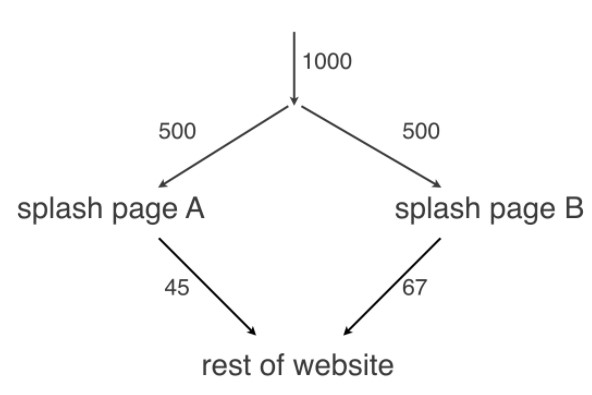

In [2]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)


You want to check: **what is the probability that you would observe at least the observed difference in number of clicks through if that were the case?** This is asking exactly the question you can address with a hypothesis test.
####  Null hypothesis
A permutation test is a good choice here because you can simulate the result as if the redesign had no effect on the click-through rate.
#### Permutation test of clicks through
- For each splash page design, we have a Numpy array which contains `1` or `0` values for whether or not a visitor clicked through. 
- Next, we need to define a function diff_frac for our test statistic. Ours is the fraction of visitors who click through. We can compute the fraction who click through by summing the entries in the arrays of ones and zeros and then dividing by the number of entries. 
- Finally we compute the observed value of the test statistic using this function `diff_frac`. 

In [3]:
# Generate randomly 2 arr. "clickthrough_A" and "clickthrough_B" of 0s and 1s
clickthrough_A = np.random.choice([0, 1], size = 120)
clickthrough_B = np.random.choice([0, 1], size = 150)

# Define a function
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)    
    return frac_A - frac_B

diff_frac(clickthrough_A, clickthrough_B)

0.04166666666666663

Now everything is in place to generate our permutation replicates of the test statistic using the `permutation_replicate` function you wrote in the exercises; we will generate 10,000. 

In [4]:
diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)
perm_replicates = np.empty(10000) 

for k in range(10000):
    perm_replicates[i] = permutation_replicate(clickthrough_A, clickthrough_B, diff_frac)

p_value = np.sum(perm_replicates > diff_frac_obs) / 10000
p_value

0.016

We compute the p-value as the number of replicates where the test statistic was at least as great as what we observed. We get a value of `0.16`, which is relatively small, so we might reasonably think that the redesign is a real improvement. 

This is an example of an A/B test.
#### A/B test
A/B testing is often used by organizations to see if a change in strategy gives different, hopefully better, results.

Generally, the null hypothesis in an A/B test is that your test statistic is impervious to the change. A low p-value implies that the change in strategy lead to a change in performance. 

Once again, though, be warned that statistical significance does not mean practical significance. A difference in click-though rate may be statistically significant, but if it is only a couple people more per day, your marketing team may not consider the change worth the cost! A/B testing is just a special case of the hypothesis testing framework we have already been working with, a fun and informative one.

### 1.2. PRACTICES.
#### Exercise 1.2.1. The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

Recall that we had establish the `draw_perm_reps` function as follow,

In [5]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1): ]

    return perm_sample_1, perm_sample_2

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote.

You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) 

To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

#### SOLUTION.

In [6]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


#### Exercise 1.2.2. What is equivalent?
You have experience matching stories to probability distributions. Similarly, you use the same procedure for two different A/B tests if their stories match. In the Civil Rights Act example you just did, you performed an A/B test on voting data, which has a Yes/No type of outcome for each subject (in that case, a voter). Which of the following situations involving testing by a web-based company has an equivalent set up for an A/B test as the one you just did with the Civil Rights Act of 1964?
#### Answers.
You measure the number of people who click on an ad on your company's website before and after changing its color. [The `"Democrats"` are those who view the ad before the color change, and the `"Republicans"` are those who view it after.]

#### Exercise 1.2.3. A time-on-website analog
It turns out that you already did a hypothesis test analogous to an `A/B` test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. `"Before" = Frog A` and `"after" = Frog B`. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where `"nht"` is meant to stand for `"no-hitter time."`
#### SOLUTION

In [7]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0002


#### Exercise 1.2.4. What should you have done first?
That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters. But **what should you have done with the data first**?
#### Answers.
**Performed EDA**, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras. Always a good idea to do first! I encourage you to go ahead and plot the ECDFs right now. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

## 2. Test of correlation
Consider again the swing state county-level voting data.
### 2.1. Theory.
#### 2008 US swing state election results
In the prequel to this course, we computed the Pearson correlation coefficient between Obama's vote share and the total number of votes. Remember the Pearson correlation coefficient is a measure of how much of the variability in two variables is due to them being correlated. It ranges from -1 for totally negatively correlated to 1 for positively correlated. 

We got a value of `0.54`.

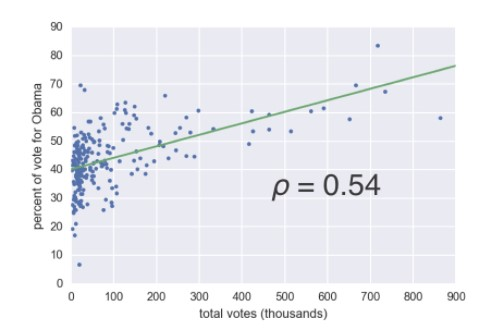

In [8]:
## Hình minh họa Image(fig1, height, width)

This value of the Pearson correlation indicates that the data are not perfectly correlated, but are correlated nonetheless. But how can we know for sure if this correlation is real, or if it could have happened just by chance?
####  Hypothesis test of correlation
We can do a hypothesis test! We posit a null hypothesis that there is no correlation between the two variables, in this case Obama's vote share and total votes. 

We then simulate the election assuming the null hypothesis is true (which you will figure out how to do in the exercises), and use the Pearson correlation coefficient as the test statistic. 

The `p-value` is then the fraction of replicates that have a `Pearson correlation coefficient` at least as large as what was observed. I did this procedure, and in all 10,000 of my replicates under the null hypothesis, not one had a Pearson correlation coefficient as high as the observed value of `0.54`.

#### More populous counties voted for Obama??
I tried generating 100,000, and then a million replicates.

In all cases, not one replicate had a Pearson correlation coefficient as high as point-54. This does not mean that the p-value is zero. It means that it is so low that we would have to generate an enormous number of replicates to have even one that has a test statistic sufficiently extreme. 

We conclude that the `p-value` is very very small and there is essentially no doubt that counties with higher vote count tended to vote for Obama. After all, that is how he won the election.

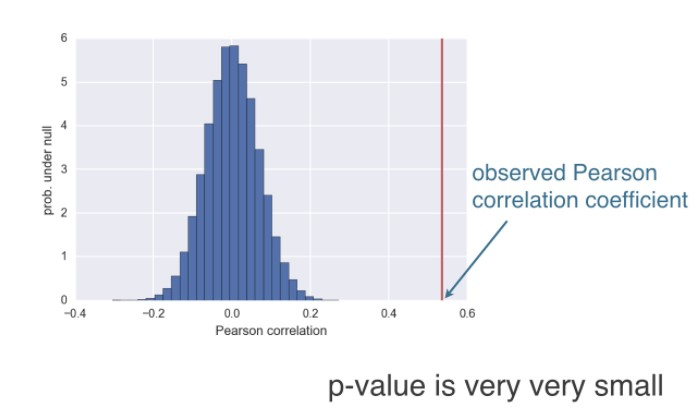

In [9]:
## Hình minh họa Image(fig1, height, width)

### 2.2. PRACTICES
#### Exercise 2.2.1. Simulating a null hypothesis concerning correlation
The observed correlation between female `illiteracy` and `fertility` in the data set of 162 countries may just be by chance; the `fertility` of a given country may actually be totally independent of its `illiteracy`. You will test this `null hypothesis` in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, **which is the best way to do it?**

>- A. Choose 162 `random numbers` to represent the `illiteracy` rate and 162 random numbers to represent the corresponding `fertility` rate.
>- B. Do a `pairs bootstrap`: Sample pairs of observed data with replacement to generate a new set of (`illiteracy`, `fertility`) data.
>- C. Do a `bootstrap sampling` in which you sample 162 illiteracy values with replacement and then 162 `fertility` values with replacement.
>- D. Do a `permutation test`: Permute the `illiteracy` values but leave the `fertility` values fixed to generate a new set of (`illiteracy`, `fertility`) data.
>- E. Do a `permutation test`: Permute both the `illiteracy` and `fertility` values to generate a new set of (`illiteracy`, `fertility` data).

#### Answers & explaination.
>- A. Incorrect! If you just randomly choose numbers, they have `nothing at all to do with the measured data`.
>- B. Incorrect! `Pairs bootstrap` will get you a `confidence interval on the Pearson correlation`. You can get a confidence interval for its value. You would find, for example, that it cannot be close to zero. But this is not a simulation of the null hypothesis.
>- C. Incorrect! This works and is a `legitimate way to simulate the data`. The pairings are now random. However, it is not preferred because it is `not exact like a permutation test` is.
>- D. **Correct!!** this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because` which illiteracy value pairs to which fertility value is shuffled`. 
>- E. Incorrect! This `works perfectly`, and is exact because it uses all data and eliminates any correlation because we shuffle which illiteracy value pairs to which fertility value. `However`, it is `not necessary, and computationally inefficient`, to permute both illiteracy and fertility.

#### Exercise 2.2.2. Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. 

For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [10]:
def pearson_r(data1, data2):
    return np.corrcoef(data1, data2)[0, 1]
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#### Comments.
- This means that your `p-value` is very low, since you never got a single replicate in the 10,000 you took that had a `Pearson correlation` greater than the observed one. 
- You could try increasing the number of replicates you take to continue to move the upper bound on your `p-value` lower and lower.

#### Exercise 2.2.3. Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do `EDA`, as usual. Plot `ECDFs` of the `alive sperm count` for `untreated bees` (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

#### SOLUTION.

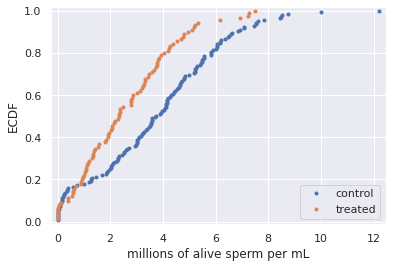

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

#### Exercise 2.2.4. Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

#### Reminder

In [12]:
def bootstrap_replicate_1d(data, func):
    """Generare boostrap replicate of 1D-data"""
    bs_sample = np.random.choice(data, size = len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#### SOLUTION

In [13]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate([control, treated]))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control-bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0
